# 引入归一化

In [45]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler   

In [46]:
config = {
    "mathtext.fontset":'stix',
    "font.family":'serif',
    "font.serif": ['SimHei'],
    "font.size": 10,   # 字号，大家自行调节
    'axes.unicode_minus': False # 处理负号，即-号
}
rcParams.update(config)  ## 设置画图的一些参数

In [47]:
# 读取数据
import pandas as pd
import chardet
path = '/Users/Lenovo/Desktop/regress_data1.csv'
with open(path, 'rb') as f:  
    result = chardet.detect(f.read())  
    encoding = result['encoding'] 
data = pd.read_csv(path,encoding=encoding) ## data 是dataframe 的数据类型

In [48]:
cols = data.shape[1]
X_data = data.iloc[:,:-1]
y_data = data.iloc[:,-1:]

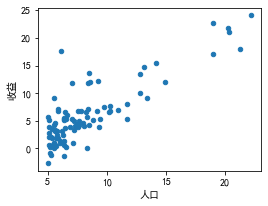

In [49]:
data.plot(kind='scatter', x='人口', y='收益', figsize=(4,3)) # 利用散点图可视化数据
import matplotlib
plt.xlabel('人口')
plt.ylabel('收益', rotation=90)
plt.show()

In [50]:
X_data.insert(0, 'Ones', 1)
X=X_data.values
Y=y_data.values
W=np.array([[0.0],[0.0]]) ## 初始化W系数矩阵，w 是一个(2,1)矩阵

归一化处理

In [51]:
scaler = StandardScaler()  
X_data_scaled = scaler.fit_transform(X_data)  

In [52]:
X_data_scaled = np.insert(X_data_scaled, 0, 1, axis=1)  
X = X_data_scaled  
Y = y_data.values.reshape(-1, 1)  

初始化参数

In [53]:
W = np.zeros((X.shape[1], 1))  
alpha = 0.01   
iters = 1000   
loss_his = [] 

梯度下降函数

In [54]:
def gradientDescent(X, Y, W, alpha, iters):  
    m = X.shape[0]  
    for i in range(iters):  
        Y_hat = np.dot(X, W)  
        loss = np.sum((Y_hat - Y) ** 2) / (2 * m)  
        loss_his.append(loss)  
        dW = np.dot(X.T, (Y_hat - Y)) / m  
        W = W - alpha * dW  
    return W, loss_his  

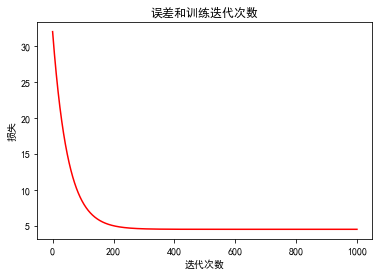

In [55]:
W_final, loss_his = gradientDescent(X, Y, W, alpha, iters)

plt.figure(figsize=(6, 4))  
plt.plot(np.arange(iters), loss_his, 'r')  
plt.xlabel('迭代次数')  
plt.ylabel('损失')  
plt.title('误差和训练迭代次数')  
plt.show()  

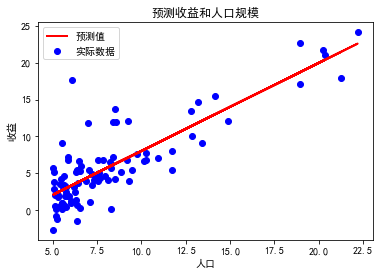

In [57]:
X_data_plot = scaler.transform(X_data)  
X_data_plot = np.insert(X_data_plot, 0, 1, axis=1)  
Y_pred = np.dot(X_data_plot, W_final)

plt.figure(figsize=(6, 4))  
plt.scatter(X_data['人口'], y_data, color='blue', label='实际数据')  
plt.plot(X_data['人口'], Y_pred, color='red', linewidth=2, label='预测值')  
plt.xlabel('人口')  
plt.ylabel('收益')  
plt.title('预测收益和人口规模')  
plt.legend()  
plt.show()